In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
def calculateErrors(numTrees, numFeatures, trainingData, trainingLabels, testData, testLabels):
    trainingErrors = []
    testErrors = []
    trainingLabels = np.ravel(trainingLabels)
    testLabels = np.ravel(testLabels)
    
    for i in numTrees:
        clf = RandomForestClassifier(n_estimators=i, max_features=numFeatures, criterion='entropy')
        clf.fit(trainingData, trainingLabels)
        trainingErrors.append(1 - clf.score(trainingData, trainingLabels))
        testErrors.append(1 - clf.score(testData, testLabels))
    
    return trainingErrors, testErrors

In [3]:
def graphResults(trainErrors, testErrors, numTrees):
    trainErrors = np.array(trainErrors) * 100
    testErrors = np.array(testErrors) * 100
    numTrees = np.array(numTrees)
    plt.plot(numTrees, trainErrors, linestyle='-', marker='o', color='r', label='Train')
    plt.plot(numTrees, testErrors, linestyle='-', marker='o', color='b', label='Test')
    plt.grid(True)
    plt.xticks(numTrees)
    plt.title('Misclassification Error vs Random Forest Size')
    plt.xlabel('Random Forest Sizes')
    plt.ylabel('Misclassification Error (%)')
    plt.legend()
    plt.show()

In [4]:
trainingData = pd.read_csv('data/MADELON/madelon_train.data', delim_whitespace=True, header=None)
trainingLabels = pd.read_csv('data/MADELON/madelon_train.labels', delim_whitespace=True, header=None)
testData = pd.read_csv('data/MADELON/madelon_valid.data', delim_whitespace=True, header=None)
testLabels = pd.read_csv('data/MADELON/madelon_valid.labels', delim_whitespace=True, header=None)

In [5]:
numTrees = [3, 10, 30, 100, 300]

In [6]:
errorTableSqrt = pd.DataFrame({"Features":["sqrt(500)", "sqrt(500)", "sqrt(500)", "sqrt(500)", "sqrt(500)"], "Training Error (%)":[0, 0, 0, 0, 0], "Test Error (%)":[0, 0, 0, 0, 0]}, index=numTrees)
errorTableSqrt.index.name = "Forest Size"

In [7]:
trainingErrors, testErrors = calculateErrors(numTrees, math.floor(math.sqrt(500)), trainingData, trainingLabels, testData, testLabels)

In [8]:
for(size, trainingError, testError) in zip(numTrees, trainingErrors , testErrors ):
    errorTableSqrt.loc[size, 'Training Error (%)'] = round(trainingError * 100, 2)
    errorTableSqrt.loc[size, 'Test Error (%)'] = round(testError * 100, 2)

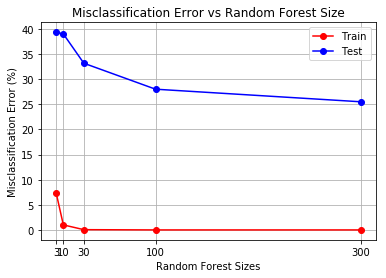

In [9]:
graphResults(trainingErrors, testErrors, numTrees)

In [10]:
errorTableLn = pd.DataFrame({"Features":["ln(500)", "ln(500)", "ln(500)", "ln(500)", "ln(500)"], "Training Error (%)":[0, 0, 0, 0, 0], "Test Error (%)":[0, 0, 0, 0, 0]}, index=numTrees)
errorTableLn.index.name = "Forest Size"

In [11]:
trainingErrors, testErrors = calculateErrors(numTrees, math.floor(math.log(500)), trainingData, trainingLabels, testData, testLabels)

In [12]:
for(size, trainingError, testError) in zip(numTrees, trainingErrors, testErrors):
    errorTableLn.loc[size, 'Training Error (%)'] = round(trainingError * 100, 2)
    errorTableLn.loc[size, 'Test Error (%)'] = round(testError * 100, 2)

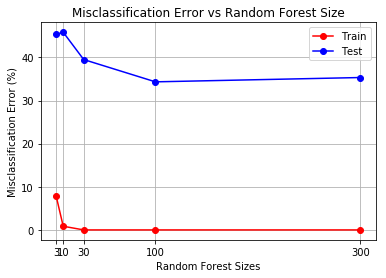

In [13]:
graphResults(trainingErrors, testErrors, numTrees)

In [14]:
errorTableAll = pd.DataFrame({"Features":["500", "500", "500", "500", "500"], "Training Error (%)":[0, 0, 0, 0, 0], "Test Error (%)":[0, 0, 0, 0, 0]}, index=numTrees)
errorTableAll.index.name = "Forest Size"

In [15]:
trainingErrors, testErrors = calculateErrors(numTrees, 500, trainingData, trainingLabels, testData, testLabels)

In [16]:
for(size, trainingError, testError) in zip(numTrees, trainingErrors, testErrors):
    errorTableAll.loc[size, 'Training Error (%)'] = round(trainingError * 100, 2)
    errorTableAll.loc[size, 'Test Error (%)'] = round(testError * 100, 2)

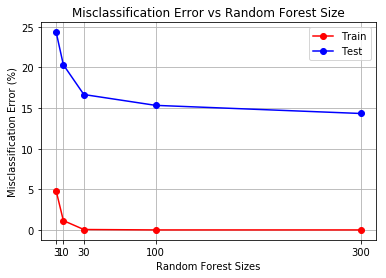

In [17]:
graphResults(trainingErrors, testErrors, numTrees)

In [18]:
errorTableFull = pd.concat([errorTableSqrt, errorTableLn, errorTableAll])
errorTableFull

,Features,Training Error (%),Test Error (%)
Forest Size,,,
3,sqrt(500),7.35,39.33
10,sqrt(500),1.00,39.00
30,sqrt(500),0.05,33.17
100,sqrt(500),0.00,28.00
300,sqrt(500),0.00,25.50
3,ln(500),7.95,45.33
10,ln(500),0.85,45.83
30,ln(500),0.00,39.50
100,ln(500),0.00,34.33
